In [1]:
from typing import TypedDict, List 
from langgraph.graph import StateGraph,START,END

In [3]:
# Define the structure of the state
class State(TypedDict):
    n1 : int 
    n2 : int 
    n3 : int 
    n4 : int 
    final1 : int 
    final2 : int 
    operation : str

# define the nodes
def adder1(state : State) -> State: 
    """ Add two numbers and store them in final"""
    state['final1'] = state['n1'] + state['n2']
    return state
def adder2(state : State) -> State: 
    """ Add two numbers and store them in final"""
    state['final2'] = state['n3'] + state['n4']
    return state

def substractor1(state : State) -> State: 
    """ Subtract the two final numbers"""
    state['final1'] = state['n1'] - state['n2']
    return state

def substractor2(state : State) -> State: 
    """ Subtract the two final numbers"""
    state['final2'] = state['n3'] - state['n4']
    return state

def decision_maker1(state : State) -> str:
    """ choose which link to follow next """
    if state['operation'] =="+":
        return "addition_operation1"
    else:
        return "substraction_operation1"
    
def decision_maker2(state : State) -> str:
    """ choose which link to follow next """
    if state['operation'] =="+":
        return "addition_operation2"
    else:
        return "substraction_operation2"    
# build the graph 
graph = StateGraph(State)
 
# add the nodes
graph.add_node("adder1",adder1)
graph.add_node("adder2",adder2)
graph.add_node("substractor1",substractor1)     
graph.add_node("substractor2",substractor2)
graph.add_node("router1",lambda state:state)
graph.add_node("router2",lambda state:state)
# add the  edges 
graph.add_edge(START,"router1")
graph.add_conditional_edges("router1",decision_maker1,{"addition_operation1" : "adder1","substraction_operation1" : "substractor1" })
graph.add_edge("adder1","router2")
graph.add_edge("substractor1","router2")
graph.add_conditional_edges("router2",decision_maker2,{"addition_operation2" : "adder2","substraction_operation2" : "substractor2" })
graph.add_edge("adder2",END)
graph.add_edge("substractor2",END)

# compile 
app = graph.compile()


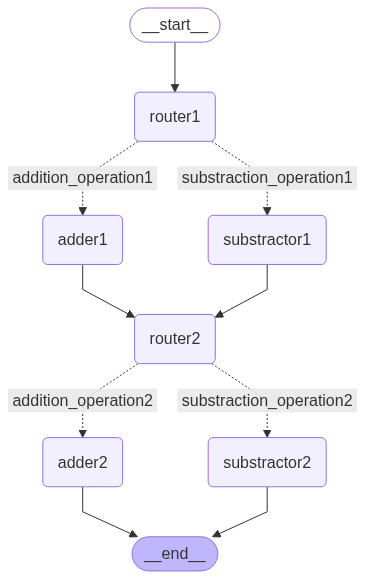

In [4]:
graph.compile()
